In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
import os
os.environ['KAGGLE_USERNAME']='adarshanooj'
os.environ['KAGGLE_KEY']='22552fb224f3dca84d0038a25dc78894'

In [ ]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

covid-face-mask-detection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip covid-face-mask-detection-dataset.zip

Archive:  covid-face-mask-detection-dataset.zip
replace New Masks Dataset/Test/Mask/2070.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
main_dir = '/content/New Masks Dataset'
train_dir = os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
valid_dir = os.path.join(main_dir,'Validation')

train_mask_dir = os.path.join(train_dir,'Mask')
train_nomask_dir = os.path.join(train_dir,'Non Mask')

In [ ]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_nomask_names = os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

['1513.jpg', '0715.jpg', '0488.jpg', '1555.jpg', '0972.jpg', '0746.jpg', '0003.jpg', '0048.jpg', '0731.jpg', '0760.jpg']
['259.jpg', '308.jpg', '311.jpg', '164.jpg', '231.jpg', '136.jpg', '351.jpg', '108.jpg', '169.jpg', '326.jpg']


['/content/New Masks Dataset/Train/Mask/1513.jpg', '/content/New Masks Dataset/Train/Mask/0715.jpg', '/content/New Masks Dataset/Train/Mask/0488.jpg', '/content/New Masks Dataset/Train/Mask/1555.jpg', '/content/New Masks Dataset/Train/Mask/0972.jpg', '/content/New Masks Dataset/Train/Mask/0746.jpg', '/content/New Masks Dataset/Train/Mask/0003.jpg', '/content/New Masks Dataset/Train/Mask/0048.jpg']
['/content/New Masks Dataset/Train/Non Mask/259.jpg', '/content/New Masks Dataset/Train/Non Mask/308.jpg', '/content/New Masks Dataset/Train/Non Mask/311.jpg', '/content/New Masks Dataset/Train/Non Mask/164.jpg', '/content/New Masks Dataset/Train/Non Mask/231.jpg', '/content/New Masks Dataset/Train/Non Mask/136.jpg', '/content/New Masks Dataset/Train/Non Mask/351.jpg', '/content/New Masks Dataset/Train/Non Mask/108.jpg']


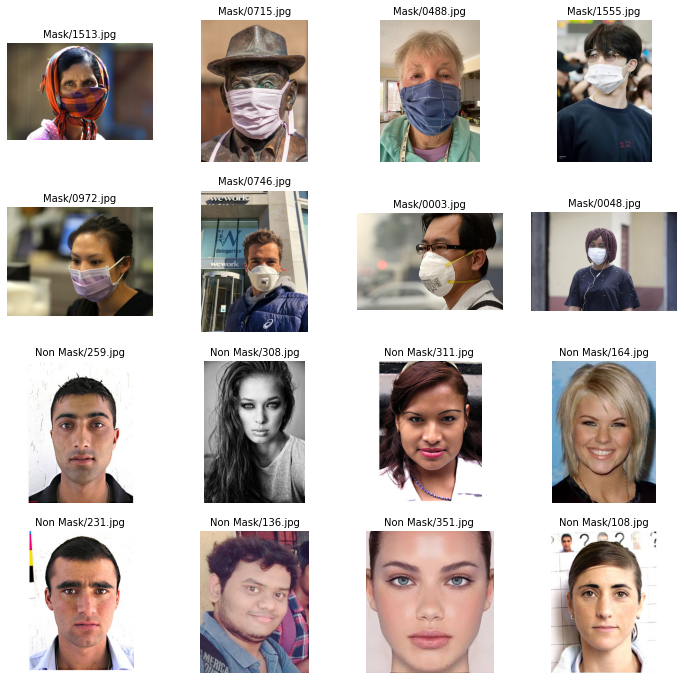

In [ ]:
import matplotlib.image as mpimg
nrows = 4
ncols = 4
plt.figure(figsize=(12,12))

mask_pic = []
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))

nomask_pic = []
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))

print(mask_pic)
print(nomask_pic)

merged_list = mask_pic+nomask_pic

for i in range(0,len(merged_list)):
  data = merged_list[i].split('/',4)[4]
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('off')
  image = mpimg.imread(merged_list[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')

plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2,
                                   rotation_range = 40,
                                   horizontal_flip = True
                                   )

test_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )

valid_generator = validation_datagen.flow_from_directory(valid_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [ ]:
train_generator.image_shape

(150, 150, 3)

In [ ]:


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='SAME', activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Conv2D(64, (3,3), padding='SAME', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 87616)            

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = valid_generator)

Epoch 1/30
19/19 [==============================] - 11s 600ms/step - loss: 3.2361 - accuracy: 0.5633 - val_loss: 0.6690 - val_accuracy: 0.5915
Epoch 2/30
19/19 [==============================] - 11s 585ms/step - loss: 0.5866 - accuracy: 0.7150 - val_loss: 0.6351 - val_accuracy: 0.8137
Epoch 3/30
19/19 [==============================] - 11s 576ms/step - loss: 0.4039 - accuracy: 0.8533 - val_loss: 0.4227 - val_accuracy: 0.8889
Epoch 4/30
19/19 [==============================] - 11s 579ms/step - loss: 0.3923 - accuracy: 0.8500 - val_loss: 0.4719 - val_accuracy: 0.8758
Epoch 5/30
19/19 [==============================] - 11s 587ms/step - loss: 0.3142 - accuracy: 0.8867 - val_loss: 0.3430 - val_accuracy: 0.9052
Epoch 6/30
19/19 [==============================] - 11s 591ms/step - loss: 0.2506 - accuracy: 0.9117 - val_loss: 0.2930 - val_accuracy: 0.9118
Epoch 7/30
19/19 [==============================] - 11s 592ms/step - loss: 0.2419 - accuracy: 0.9117 - val_loss: 0.3013 - val_accuracy: 0.8922

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

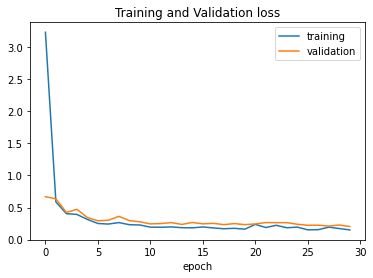

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["training","validation"])
plt.title('Training and Validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

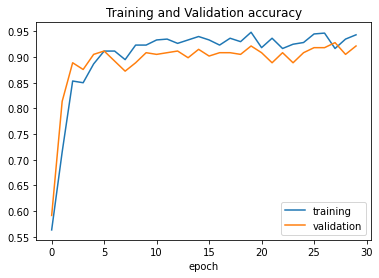

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["training","validation"])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('test loss:{} test acc:{}'.format(test_loss, test_acc))

4/4 [==============================] - 1s 173ms/step - loss: 0.1733 - accuracy: 0.9100
test loss:0.17331381142139435 test acc:0.9100000262260437


In [ ]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for fname in uploaded.keys():
  img_path = '/content/'+fname
  img = image.load_img(img_path,target_size=(150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction == 0:
    print('mask')

  else:
    print('no mask')

Saving nomask.jpg to nomask.jpg
nomask.jpg
no mask


In [ ]:
model.save('model.h5')